Classify Music in Different Genres

In [ ]:
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, json, math, librosa
import IPython.display as ipd
import librosa.display
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split

In [ ]:
import librosa.display

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
PATH_OF_DATA="/content/drive/My Drive/genres_original/"
!ls {PATH_OF_DATA}


In [ ]:
train_audio_path="/content/drive/My Drive/genres_original/blues/"
filename="blues.00006.wav"
signal,sample_rate=librosa.load(str(train_audio_path)+filename)

In [ ]:
sample_rate

22050

In [ ]:
signal

array([-0.03344727, -0.05490112, -0.05435181, ..., -0.08416748,
        0.02886963,  0.1296997 ], dtype=float32)

In [ ]:
signal,sample_rate=librosa.load(str(train_audio_path)+filename)

In [ ]:
import numpy as np
fft=np.fft.fft(signal)
magnitude=np.abs(fft)
magnitude

array([56.98974609,  1.50706946,  1.57227461, ...,  2.73289774,
        1.57227461,  1.50706946])

In [ ]:
len(signal)

661794

In [ ]:
len(magnitude)

661794

In [ ]:
len(fft)

661794

In [ ]:
frequency=np.linspace(0,sample_rate,len(magnitude))
frequency

array([0.00000000e+00, 3.33185754e-02, 6.66371509e-02, ...,
       2.20499334e+04, 2.20499667e+04, 2.20500000e+04])

In [ ]:
len(frequency)

661794

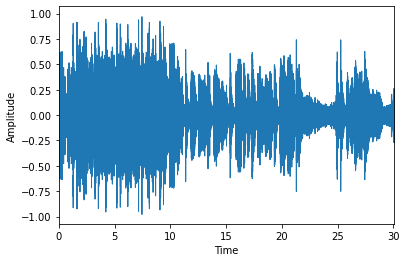

In [ ]:
import matplotlib.pyplot as plt
librosa.display.waveplot(signal,sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

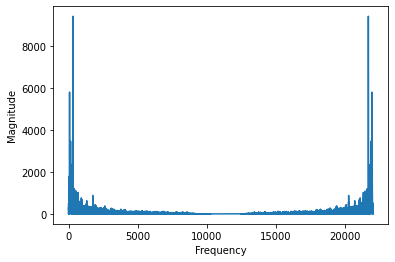

In [ ]:
plt.plot(frequency,magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
left_frequency=frequency[:int(len(frequency)/2)]

In [ ]:
left_magnitude=magnitude[:int(len(frequency)/2)]

In [ ]:
n_fft=2048
hop_length=512
stft=librosa.core.stft(signal,n_fft=n_fft)
spectogram=np.abs(stft)

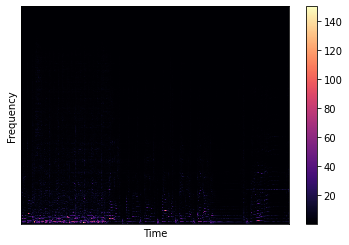

In [ ]:
librosa.display.specshow(spectogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

In [ ]:
log_spectogram=librosa.amplitude_to_db(spectogram)

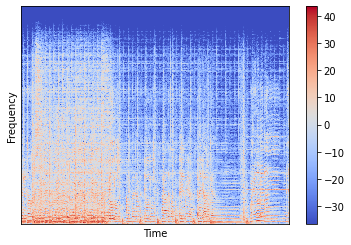

In [ ]:
librosa.display.specshow(log_spectogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

In [ ]:
MFCCs=librosa.feature.mfcc(signal,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)

In [ ]:
MFCCs

array([[-2.11657589e+02, -1.63341073e+02, -1.09847161e+02, ...,
        -1.70241910e+02, -1.35825599e+02, -1.10032944e+02],
       [ 9.02549679e+01,  1.24633083e+02,  1.38243205e+02, ...,
         6.95009013e+01,  7.85216092e+01,  8.85190323e+01],
       [-1.02372889e+01, -2.41069229e+01, -3.88696751e+01, ...,
        -2.38578728e+01, -3.79072273e+01, -4.23619597e+01],
       ...,
       [-7.73001903e+00, -1.08974257e+01, -1.07657617e+01, ...,
        -2.33192629e+01, -9.97644989e+00,  8.36067198e-02],
       [ 1.50084886e+01,  1.32245664e+01,  4.97154213e+00, ...,
        -4.74916438e+00, -1.55222204e+00,  2.33385244e+00],
       [-2.86700359e+00, -4.13182762e+00, -6.55293243e+00, ...,
        -2.13841101e+01, -1.97870633e+01, -1.33935138e+01]])

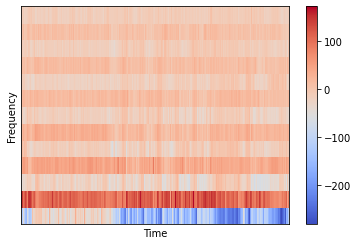

In [ ]:
librosa.display.specshow(MFCCs,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

In [ ]:
import IPython.display as ipd
audio_path=str("/content/drive/My Drive/genres_original/blues/blues.00001.wav")
ipd.Audio("/content/drive/My Drive/genres_original/blues/blues.00001.wav")

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib 
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

import keras
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
DATASET_PATH = '/content/drive/My Drive/genres_original'
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                if file_path != '/content/drive/My Drive/genres_original/jazz/jazz.00054.wav': # only this particular file is not in correct format
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment
                        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
      



DATA PROCESSING

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)

In [ ]:
DATA_PATH = '/content/data_10.json'


def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z


In [ ]:
def prepare_datasets(test_size, validation_size):

    # load data
    X, y, z = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z

In [ ]:
def build_model(input_shape):

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [ ]:
def predict(model, X, y):

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    
    # get mappings for target and predicted label
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 214, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 107, 6, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 107, 6, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 105, 4, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 1, 32)         4

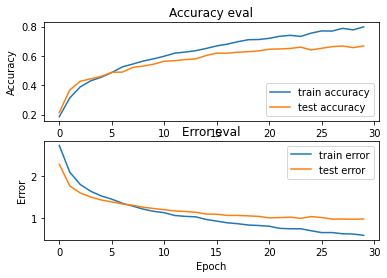

47/47 - 1s - loss: 0.9814 - accuracy: 0.6702

Test accuracy: 0.6702269911766052


In [ ]:
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.25, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

PREDICTION

In [ ]:

X_to_predict = X_test[200]
y_to_predict = y_test[200]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: blues, Predicted label: ['blues']


PART 4

In [ ]:
def model_layer(input_shape,i):

    # build network topology
    model = keras.Sequential()
    if(i==2):
      # 1st conv layer
      model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
      model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

      model.add(keras.layers.Flatten())
      model.add(keras.layers.Dense(64, activation='relu'))
      model.add(keras.layers.Dropout(0.3))

      # output layer
      model.add(keras.layers.Dense(10, activation='softmax'))
    elif(i==3):
        # 1st conv layer
      model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
      model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

      # 2nd conv layer
      model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
      model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

      model.add(keras.layers.Flatten())
      model.add(keras.layers.Dense(64, activation='relu'))
      model.add(keras.layers.Dropout(0.3))

      # output layer
      model.add(keras.layers.Dense(10, activation='softmax'))

    elif(i==4):
          # 1st conv layer
      model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
      model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

      # 2nd conv layer
      model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
      model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

      # 3rd conv layer
      model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
      model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

          # flatten output and feed it into dense layer
      model.add(keras.layers.Flatten())
      model.add(keras.layers.Dense(64, activation='relu'))
      model.add(keras.layers.Dropout(0.3))

      # output layer
      model.add(keras.layers.Dense(10, activation='softmax'))
    
    elif(i==5):

      # 1st conv layer
      model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
      model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

      # 2nd conv layer
      model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
      model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

      # 3rd conv layer
      model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
      model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
      model.add(keras.layers.BatchNormalization())

      # flatten output and feed it into dense layer
      model.add(keras.layers.Flatten())
      model.add(keras.layers.Dense(64, activation='relu'))
      model.add(keras.layers.Dropout(0.3))

      # output layer
      model.add(keras.layers.Dense(10, activation='softmax'))
      # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
import time
train = []
test = []
total_time = []
# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
layer = [2,3,4,5]
for i in layer:
  model = model_layer(input_shape,i)
  start = time.time()
  # train model
  history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)
  end = time.time()
  time.sleep(1)

  # evaluate model on test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=None)
  train_loss, train_acc = model.evaluate(X_train, y_train, verbose=None)
  train.append(train_acc)
  test.append(train_acc)
  total_time.append(end-start)

Epoch 1/30
113/113 [==============================] - 8s 70ms/step - loss: 1.8941 - accuracy: 0.3394 - val_loss: 1.7069 - val_accuracy: 0.3904
Epoch 2/30
113/113 [==============================] - 8s 70ms/step - loss: 1.5910 - accuracy: 0.4323 - val_loss: 1.4323 - val_accuracy: 0.5050
Epoch 3/30
113/113 [==============================] - 8s 70ms/step - loss: 1.4561 - accuracy: 0.4771 - val_loss: 1.3678 - val_accuracy: 0.5150
Epoch 4/30
113/113 [==============================] - 8s 70ms/step - loss: 1.3678 - accuracy: 0.5032 - val_loss: 1.2996 - val_accuracy: 0.5284
Epoch 5/30
113/113 [==============================] - 8s 70ms/step - loss: 1.2786 - accuracy: 0.5332 - val_loss: 1.2816 - val_accuracy: 0.5417
Epoch 6/30
113/113 [==============================] - 8s 70ms/step - loss: 1.1752 - accuracy: 0.5803 - val_loss: 1.2878 - val_accuracy: 0.5439
Epoch 7/30
113/113 [==============================] - 9s 79ms/step - loss: 1.0749 - accuracy: 0.6047 - val_loss: 1.2391 - val_accuracy: 0.5606

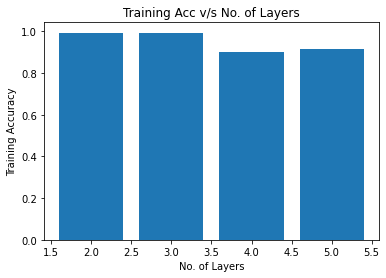

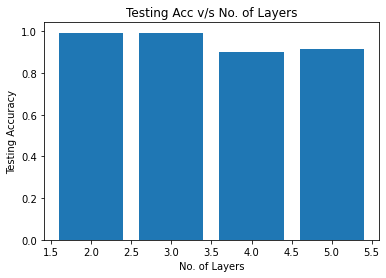

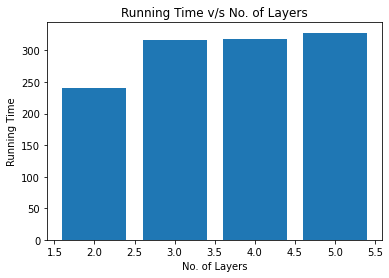

In [ ]:
import matplotlib.pyplot as plt 
# creating the bar plot 
plt.bar(layer, train) 

plt.xlabel("No. of Layers") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s No. of Layers") 
plt.show() 

plt.bar(layer, test ) 
  
plt.xlabel("No. of Layers") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s No. of Layers") 
plt.show() 

plt.bar(layer, total_time ) 
  
plt.xlabel("No. of Layers") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s No. of Layers") 
plt.show() 